In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.stats import spearmanr

sns.set_style('dark')

%matplotlib inline

In [2]:
data = pd.read_table('guidi2016_samples.csv', index_col='id', infer_datetime_format=True, parse_dates=['date_time'])
data['month'] = data.date_time.dt.month
data.head()

,station,date_time,latitude,longitude,layer,layer_description,depth,biome,region,region_province,salinity,no2,po4,no2no3,chloro,temp,oxygen,flux,npp,month
id,,,,,,,,,,,,,,,,,,,,
S4DCM,TARA_004,2009-09-15 18:00:00,36.5533,-6.5669,[DCM] deep chlorophyll maximum layer (ENVO:010...,targeting a discrete depth within the photic ...,40,Westerlies Biome,[NaNO] North Atlantic Ocean (MRGID:1912),[NaNST-E] North Atlantic Subtropical Gyral Pro...,36.556443,NaN,NaN,NaN,0.880307,16.246331,NaN,NaN,NaN,9
S4SUR,TARA_004,2009-09-15 11:30:00,36.5533,-6.5669,[SRF] surface water layer (ENVO:00010504),targeting a discrete depth at the top of the ...,5,Westerlies Biome,[NaNO] North Atlantic Ocean (MRGID:1912),[NaNST-E] North Atlantic Subtropical Gyral Pro...,36.632400,NaN,NaN,NaN,0.078000,20.525100,NaN,NaN,686.0860,9
S7DCM,TARA_007,2009-09-23 18:11:00,37.0180,1.9476,[DCM] deep chlorophyll maximum layer (ENVO:010...,targeting a discrete depth within the photic ...,42,Westerlies Biome,[MS] Mediterranean Sea (MRGID:1905),"[MEDI] Mediterranean Sea, Black Sea Province (...",NaN,0.00,0.01,0.03,0.553274,17.367460,NaN,NaN,354.2245,9
S7SUR,TARA_007,2009-09-23 17:09:45,37.0330,1.9475,[SRF] surface water layer (ENVO:00010504),targeting a discrete depth at the top of the ...,5,Westerlies Biome,[MS] Mediterranean Sea (MRGID:1905),"[MEDI] Mediterranean Sea, Black Sea Province (...",37.491100,0.00,0.06,0.03,0.081200,23.825750,NaN,NaN,354.2245,9
S9DCM,TARA_009,2009-09-28 16:59:00,39.0609,5.9422,[DCM] deep chlorophyll maximum layer (ENVO:010...,targeting a discrete depth within the photic ...,55,Westerlies Biome,[MS] Mediterranean Sea (MRGID:1905),"[MEDI] Mediterranean Sea, Black Sea Province (...",37.823200,0.02,0.02,0.08,0.434367,16.151933,NaN,NaN,205.1220,9


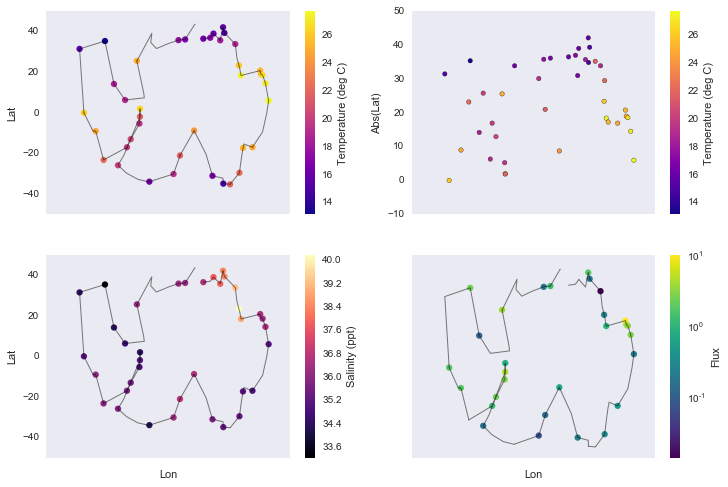

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
_data = data[data.layer.str.startswith('[DCM]')]

ax = axs[0, 0]
covar = 'temp'
ax.plot('longitude', 'latitude', data=data, alpha=0.5, c='black', lw=1)
pts = ax.scatter('longitude', 'latitude', c=covar, data=_data,
                 lw=0, s=40,
                 cmap='plasma')
ax.set_ylabel('Lat')
ax.set_xticklabels([])
ax.set_xlabel('')
cb = fig.colorbar(pts, ax=ax)
cb.set_label('Temperature (deg C)')

ax = axs[0, 1]
pts = ax.scatter(_data.longitude, _data.latitude.abs(), c=_data.temp,
                 cmap='plasma')
ax.set_ylabel('Abs(Lat)')
ax.set_xlabel('')
cb = fig.colorbar(pts, ax=ax)
cb.set_label('Temperature (deg C)')


ax = axs[1, 0]
covar = 'salinity'
ax.plot('longitude', 'latitude', data=data, alpha=0.5, c='black', lw=1)
pts = ax.scatter('longitude', 'latitude', c=covar, data=_data,
                 lw=0, s=40, cmap='magma')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
cb = fig.colorbar(pts, ax=ax)
cb.set_label('Salinity (ppt)')

ax = axs[1, 1]
covar = 'flux'
ax.plot('longitude', 'latitude', data=data, alpha=0.5, c='black', lw=1)
pts = ax.scatter('longitude', 'latitude', c=covar, data=_data,
                 lw=0, s=40,
                 norm=LogNorm(), cmap='viridis')
ax.set_xlabel('Lon')
ax.set_yticklabels([])
cb = fig.colorbar(pts, ax=ax)
cb.set_label('Flux')

SpearmanrResult(correlation=-0.7005628517823641, pvalue=4.8324613886696444e-07)

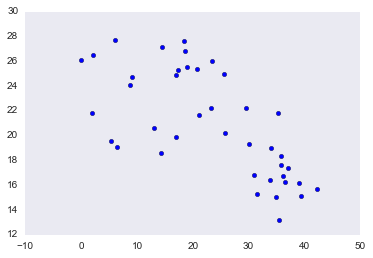

In [4]:
plt.scatter(_data.latitude.abs(), _data.temp)
spearmanr(_data.latitude.abs(), _data.temp)

SpearmanrResult(correlation=0.34052532833020643, pvalue=0.031547426214818521)

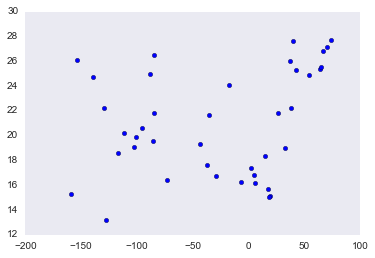

In [5]:
plt.scatter(_data.longitude, _data.temp)
spearmanr(_data.longitude, _data.temp)